In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# **Оценка количества ответветвлений (форков) в репозитории**


Ставится задача выявить зависимость одного признака от остальных. За такой признак берётся количество форков репозитория. Изначально за признак было взято более естественное значение - количество звёзд у репозитория, но ввиду наличия столбца с количеством просмотров данная задача становится почти тривиальной.

# 1. Загружаем данные

Загружаем файл из интернета:

Предварительно загрузить файл `repositories.csv` в папку для текущей сессии

In [2]:
url = "repositories.csv"
data_raw = pd.read_csv(url)

Таблица содержит данные о более, чем 215 тысячах репозиториев, являющихся лучшиими проектами по количеству звёзд, начиная со 167. Содержит много полезной информации (атрибутов).

Вначале посмотрим на размеры таблицы: количество строк (каждая строка соответствует одному репозиторию) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [3]:
data_raw.shape

(215029, 24)

Получаем, что количество данных - 215029, количество признаков - 24. Человек это не прочтёт!

Метод `data_raw.head()` отображает первые строки (по умолчанию, 5 строк) таблицы

In [4]:
data_raw.head(2)

,Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,...,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
0,freeCodeCamp,freeCodeCamp.org's open-source codebase and cu...,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24T17:49:19Z,2023-09-21T11:32:33Z,http://contribute.freecodecamp.org/,387451,374074,33599,248,...,True,True,True,False,True,False,False,False,False,main
1,free-programming-books,:books: Freely available programming books,https://github.com/EbookFoundation/free-progra...,2013-10-11T06:50:37Z,2023-09-21T11:09:25Z,https://ebookfoundation.github.io/free-program...,17087,298393,57194,46,...,True,False,True,False,True,False,False,False,False,main


In [5]:
data_raw['Language'].nunique()

369

In [155]:
(data_raw['Language'].value_counts(normalize=True)*100).head(20).sum()

90.79179504707142

А вот последние строки:

In [7]:
data_raw.tail(2)

,Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,...,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
215027,Pcode,Python 3 IDE,https://github.com/fortharris/Pcode,2013-07-29T08:55:29Z,2022-12-15T13:11:25Z,NaN,15617,167,24,4,...,True,True,True,True,False,False,False,False,False,master
215028,react-hooks,Fire off actions in stateless components.,https://github.com/tj/react-hooks,2016-09-19T23:26:58Z,2023-09-01T07:10:16Z,NaN,3,167,9,3,...,True,True,True,True,False,False,False,False,False,master


In [8]:
data_raw.info()
pass

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215029 entries, 0 to 215028
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Name             215027 non-null  object
 1   Description      206997 non-null  object
 2   URL              215029 non-null  object
 3   Created At       215029 non-null  object
 4   Updated At       215029 non-null  object
 5   Homepage         78390 non-null   object
 6   Size             215029 non-null  int64 
 7   Stars            215029 non-null  int64 
 8   Forks            215029 non-null  int64 
 9   Issues           215029 non-null  int64 
 10  Watchers         215029 non-null  int64 
 11  Language         198953 non-null  object
 12  License          161990 non-null  object
 13  Topics           215029 non-null  object
 14  Has Issues       215029 non-null  bool  
 15  Has Projects     215029 non-null  bool  
 16  Has Downloads    215029 non-null  bool  
 17  Has Wiki  

Мы видим, что столбцы (признаки) имеют имена


0.   `Name` - Название репозитория GitHub
2.   `Description      ` - Краткое текстовое описание, в котором кратко излагается цель или направленность репозитория
1.   `URL              ` - URL-адрес или веб-адрес, который ссылается на репозиторий GitHub, являющийся уникальным идентификатором репозитория
2.   `Created At` - Дата и время первоначального создания репозитория на GitHub в формате `ISO 8601`
1.  `Updated At       ` - Дата и время последнего обновления или модификации репозитория в формате `ISO 8601`
1. `Homepage         ` - URL-адрес домашней страницы или целевой страницы, связанной с хранилищем, предоставляющий дополнительную информацию или ресурсы
2.   ` Size` - Размер репозитория в байтах, указывающий общее пространство для хранения, используемое файлами и данными репозитория
1.   `Stars            ` - Количество звездочек или лайков, которые репозиторий получил от других пользователей GitHub, указывающее на его популярность
2.   `Forks            ` - Количество раз, когда репозиторий был разветвлён другими пользователями GitHub
1.   `Issues           ` - Общее количество открытых систем учёта ошибок
2.   `Watchers         ` - Количество пользователей GitHub, которые "следят" за репозиторием на предмет обновлений и изменений
1.   `Language         ` - Основной язык программирования          
2.  `License          ` - Информация о лицензии на программное обеспечение с использованием идентификатора лицензии
1.   `Topics           ` - Список тем или тегов, связанных с репозиторием, помогающий пользователям находить связанные проекты и темы, представляющие интерес
2.   `Has Issues` - Логическое значение, указывающее, включена ли в репозитории систем учёта ошибок. Если это значение равно true, это означает, что в нём есть система учёта ошибок
1.   `Has Projects` - Логическое значение, указывающее, использует ли репозиторий проекты GitHub для управления и организации задач и рабочих элементов
2.   `Has Downloads` - Логическое значение, указывающее, предлагает ли репозиторий загружаемые файлы или ресурсы пользователям
1.   `Has Wiki` - Логическое значение, указывающее, есть ли в репозитории связанная вики-страница с дополнительной документацией и информацией
2.   ` Has Pages` - Логическое значение, указывающее, включены ли в репозитории страницы GitHub, позволяющие создать веб-сайт, связанный с репозиторием
1.   `Has Discussions` - Логическое значение, указывающее, включены ли в репозитории GitHub Discussions, позволяющие проводить обсуждения в сообществе и совместную работу
2.   `Is Fork` - Логическое значение, указывающее, является ли репозиторий ответвлением другого репозитория. Если это значение равно false, это означает, что репозиторий - не ответвление
1.   `Is Archived` - Логическое значение, указывающее, заархивирован ли репозиторий. Архивированные репозитории обычно доступны только для чтения и больше активно не поддерживаются
2.   `Is Template` - Логическое значение, указывающее, настроен ли репозиторий как шаблон
1.   `Default Branch` - Имя ветки по умолчанию.

Требуется предсказать количественный признак `Price` по остальным признакам. Это *задача восстановления регрессии*.

Типы признаков:

- Качественные (*категориальные*, *факторные*):
  - Неупорядоченные (*номинальные*). Присутствуют. Пример: имя, язык, лицензия.
  - Упорядоченные (*порядковые*). Присутствуют. Даты создания и редактирования.
- Количественные (*числовые*):
  - *Непрерывные*. Присутствует единственный представитель - размер.
  - *Дискретные*. Присутствуют. Все остальные числовые признаки.

*Бинарные* признаки (которые принимают только два значения) можно считать и номинальными, и порядковыми, и дискретными. Все значения типа bool.    

Многие столбцы содержат категориальные значения. Пока они имеют тип `'Object`'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [9]:
data_raw['Name'] = data_raw['Name'].astype('category')
data_raw['Description'] = data_raw['Description'].astype('category')
data_raw['URL'] = data_raw['URL'].astype('category')
data_raw['Created At'] = data_raw['Created At'].astype('category')
data_raw['Updated At'] = data_raw['Updated At'].astype('category')
data_raw['Homepage'] = data_raw['Homepage'].astype('category')
data_raw['Language'] = data_raw['Language'].astype('category')
data_raw['License'] = data_raw['License'].astype('category')
data_raw['Topics'] = data_raw['Topics'].astype('category')
data_raw['Default Branch'] = data_raw['Default Branch'].astype('category')

Посмотрим на изобретательность людей:

In [10]:
data_raw['Default Branch'].dtype

CategoricalDtype(categories=['$(./pw3n)', '0.0.1', '0.1', '0.1.x', '0.10', '0.11.0',
                  '0.11.x', '0.13', '0.14.x', '0.16.x',
                  ...
                  'zh-hans', 'zh_tw', 'zlm', 'zoff99/dev003', 'zoom',
                  'zygisk_module', '开发分支', '自由浏览-3.2.5', '🐟', '👀'],
, ordered=False)

Информация о числовых признаках:

In [11]:
data_raw.describe()

,Size,Stars,Forks,Issues,Watchers
count,2.150290e+05,215029.000000,215029.000000,215029.000000,215029.000000
mean,5.428270e+04,1115.085142,234.207637,37.925178,1115.085142
std,7.023978e+05,3992.372050,1242.967451,196.508610,3992.372050
min,0.000000e+00,167.000000,0.000000,0.000000,167.000000
25%,3.780000e+02,237.000000,39.000000,3.000000,237.000000
50%,2.389000e+03,377.000000,79.000000,10.000000,377.000000
75%,1.528200e+04,797.000000,174.000000,28.000000,797.000000
max,1.050786e+08,374074.000000,243339.000000,26543.000000,374074.000000


Интерпретация:
- Ни у кого нет пропущенных значений
- Size: огромный разброс значений.
- Stars: количество представителей с очень большими значениями очень мало. Среднее значение больше, чем третий квартиль.
- Forks: Отношение третьего квартиля и максимума ещё больше. Очень несбалансированное распределение.
- Issues: Примерно такое же соотношение.
- Watchers: полное совпадение со `'Stars'`.

Информация о категориальных признаках:

In [12]:
data_raw.describe(include=['category'])

,Name,Description,URL,Created At,Updated At,Homepage,Language,License,Topics,Default Branch
count,215027,206997,215029,215029,215029,78390,198953,161990,215029,215029
unique,196820,206109,215029,214922,193011,74197,369,45,110123,2326
top,dotfiles,Migrated:,https://github.com/0-8-4/miui-auto-tasks,2017-06-05T20:53:58Z,2023-09-21T10:55:19Z,https://spatie.be/open-source,Python,MIT,[],master
freq,200,41,1,3,15,32,34331,78403,101072,162808


Почти все столбца содержат очень большое количество уникальных значений (более 500).

Имена столбцов (признаков) можно получить таким образом:

In [13]:
data_raw.columns

Index(['Name', 'Description', 'URL', 'Created At', 'Updated At', 'Homepage',
       'Size', 'Stars', 'Forks', 'Issues', 'Watchers', 'Language', 'License',
       'Topics', 'Has Issues', 'Has Projects', 'Has Downloads', 'Has Wiki',
       'Has Pages', 'Has Discussions', 'Is Fork', 'Is Archived', 'Is Template',
       'Default Branch'],
      dtype='object')

Имена строк (совпадают с индексами):

In [14]:
data_raw.index

RangeIndex(start=0, stop=215029, step=1)

In [15]:
data_raw['Is Fork'].value_counts(normalize=False)

False    215029
Name: Is Fork, dtype: int64

Pandas реализует 2 основных класса: `Series`, `DataFrame`

In [16]:
data_raw['License'].dtype

CategoricalDtype(categories=['0BSD', 'AFL-3.0', 'AGPL-3.0', 'Apache-2.0', 'Artistic-2.0',
                  'BSD-2-Clause', 'BSD-3-Clause', 'BSD-3-Clause-Clear',
                  'BSD-4-Clause', 'BSL-1.0', 'CC-BY-4.0', 'CC-BY-SA-4.0',
                  'CC0-1.0', 'CECILL-2.1', 'CERN-OHL-P-2.0', 'CERN-OHL-S-2.0',
                  'ECL-2.0', 'EPL-1.0', 'EPL-2.0', 'EUPL-1.1', 'EUPL-1.2',
                  'GFDL-1.3', 'GPL-2.0', 'GPL-3.0', 'ISC', 'LGPL-2.1',
                  'LGPL-3.0', 'LPPL-1.3c', 'MIT', 'MIT-0', 'MPL-2.0', 'MS-PL',
                  'MS-RL', 'MulanPSL-2.0', 'NCSA', 'NOASSERTION', 'ODbL-1.0',
                  'OFL-1.1', 'OSL-3.0', 'PostgreSQL', 'UPL-1.0', 'Unlicense',
                  'Vim', 'WTFPL', 'Zlib'],
, ordered=False)

## Пропущенные значения:

Найдём процент пропущенных значений:

In [17]:
percent_missing = data_raw.isnull().sum() * 100 / len(data_raw)
print(percent_missing)

Name                0.000930
Description         3.735310
URL                 0.000000
Created At          0.000000
Updated At          0.000000
Homepage           63.544452
Size                0.000000
Stars               0.000000
Forks               0.000000
Issues              0.000000
Watchers            0.000000
Language            7.476201
License            24.665975
Topics              0.000000
Has Issues          0.000000
Has Projects        0.000000
Has Downloads       0.000000
Has Wiki            0.000000
Has Pages           0.000000
Has Discussions     0.000000
Is Fork             0.000000
Is Archived         0.000000
Is Template         0.000000
Default Branch      0.000000
dtype: float64


Гигантское количество пропущено в `Homepage`. Но это и не страшно: даю не свою руку на отсечение, что количество форков не зависит от того, какая "домашняя страница" у данного репозитория. Важнее пропущенные значения у `License` и `Language`, так как тут уже может прослеживаться некая зависимость.

In [18]:
[feature for feature in data_raw.columns if data_raw[feature].isnull().sum() > 0]

['Name', 'Description', 'Homepage', 'Language', 'License']

## 2. Визуализируем, анализируем, боремся с выбросами (outliers)

Построим диаграмму рассеивания для следующих признаков: `Stars` и `Forks`.


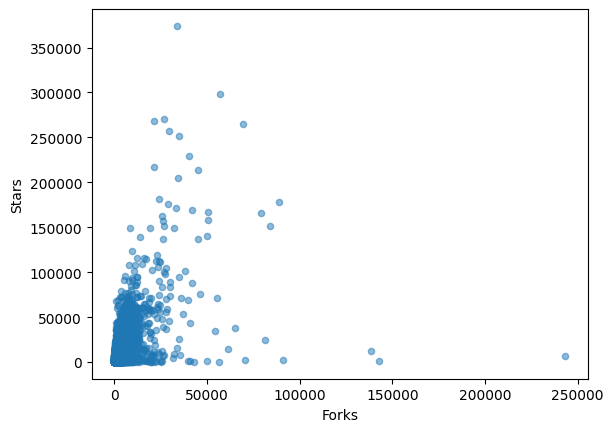

In [19]:
data_raw.plot(kind='scatter', x='Forks', y='Stars', alpha=0.5)
pass # Можно также заменить на ; или присвоить значение, чтобы результат не отображался

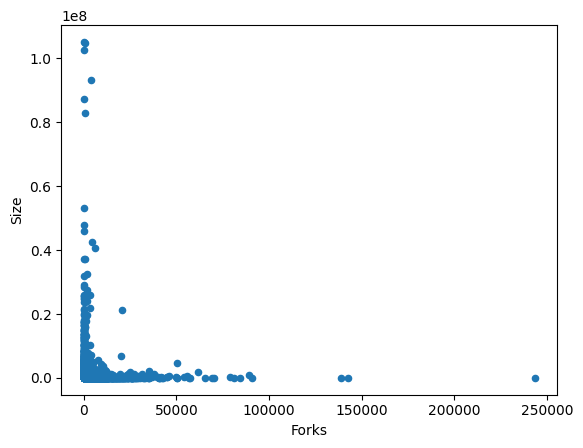

In [20]:
data_raw.plot(kind='scatter', x='Forks', y='Size')
pass

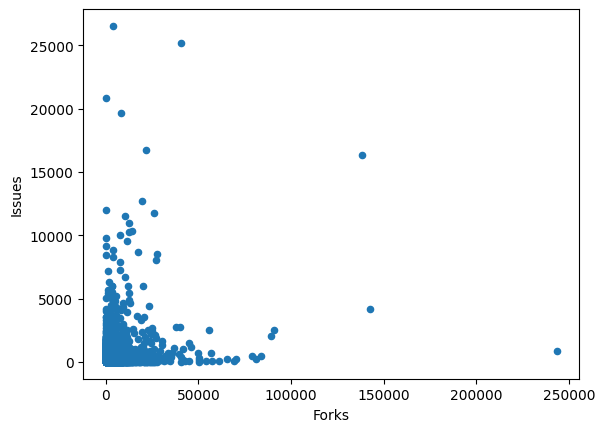

In [21]:
data_raw.plot(kind='scatter', x='Forks', y='Issues')
pass

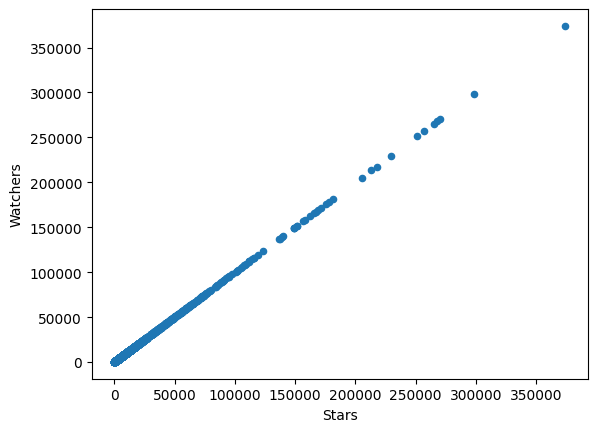

In [22]:
data_raw.plot(kind='scatter', x='Stars', y='Watchers')
pass

Можно вот так:

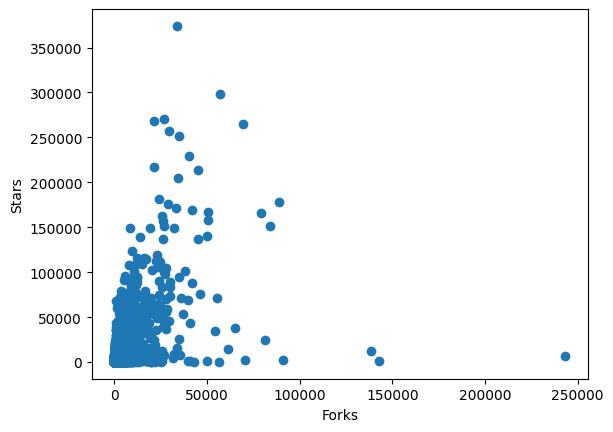

In [23]:
plt.scatter(data_raw['Forks'], data_raw['Stars'])
plt.xlabel('Forks')
plt.ylabel('Stars')
pass

Все диаграммы рассеивания:

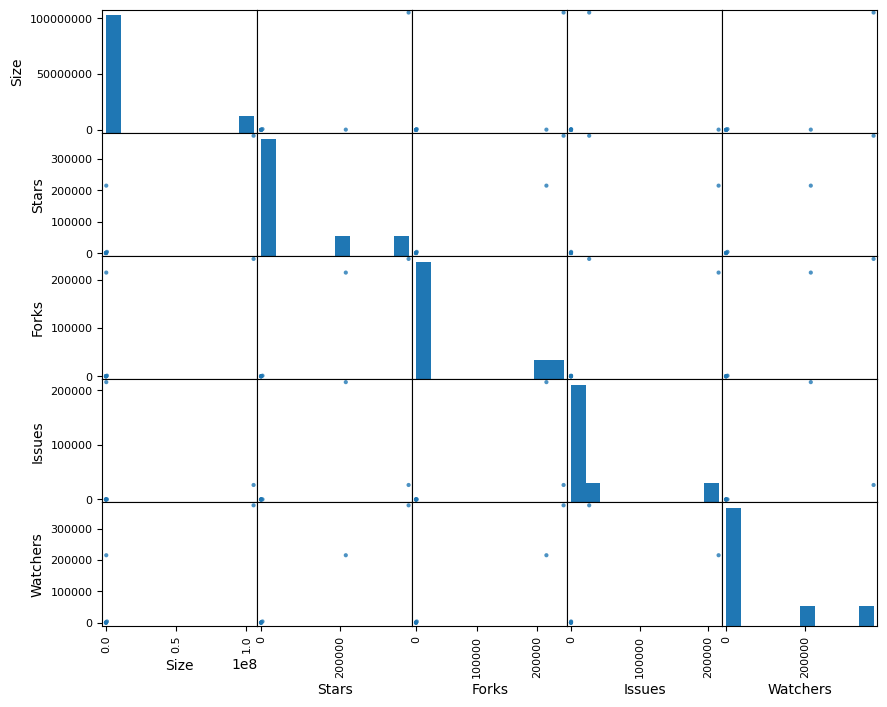

In [24]:
pd.plotting.scatter_matrix(data_raw.describe(), figsize = (10, 8), alpha=0.8)
pass

In [25]:
data_raw[data_raw['Stars'] > 250000]

,Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,...,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
0,freeCodeCamp,freeCodeCamp.org's open-source codebase and cu...,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24T17:49:19Z,2023-09-21T11:32:33Z,http://contribute.freecodecamp.org/,387451,374074,33599,248,...,True,True,True,False,True,False,False,False,False,main
1,free-programming-books,:books: Freely available programming books,https://github.com/EbookFoundation/free-progra...,2013-10-11T06:50:37Z,2023-09-21T11:09:25Z,https://ebookfoundation.github.io/free-program...,17087,298393,57194,46,...,True,False,True,False,True,False,False,False,False,main
2,awesome,😎 Awesome lists about all kinds of interesting...,https://github.com/sindresorhus/awesome,2014-07-11T13:42:37Z,2023-09-21T11:18:22Z,NaN,1441,269997,26485,61,...,True,False,True,False,True,False,False,False,False,main
3,996.ICU,Repo for counting stars and contributing. Pres...,https://github.com/996icu/996.ICU,2019-03-26T07:31:14Z,2023-09-21T08:09:01Z,https://996.icu,187799,267901,21497,16712,...,False,False,True,False,False,False,False,True,False,master
4,coding-interview-university,A complete computer science study plan to beco...,https://github.com/jwasham/coding-interview-un...,2016-06-06T02:34:12Z,2023-09-21T10:54:48Z,NaN,20998,265161,69434,56,...,True,False,True,False,False,False,False,False,False,main
5,public-apis,A collective list of free APIs,https://github.com/public-apis/public-apis,2016-03-20T23:49:42Z,2023-09-21T11:22:06Z,http://public-apis.org,5088,256615,29254,191,...,True,False,True,False,False,False,False,False,False,master
6,developer-roadmap,"Interactive roadmaps, guides and other educati...",https://github.com/kamranahmedse/developer-roa...,2017-03-15T13:45:52Z,2023-09-21T11:32:17Z,https://roadmap.sh,2267461,251416,34927,643,...,True,False,True,True,True,False,False,False,False,master


In [26]:
data_raw[data_raw['Forks'] > 1*10**5]

,Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,...,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
2449,Spoon-Knife,This repo is for demonstration purposes only.,https://github.com/octocat/Spoon-Knife,2011-01-27T19:30:43Z,2023-09-21T11:31:21Z,NaN,2,11859,138577,16367,...,True,True,True,True,False,False,False,False,False,main
5691,datasharing,The Leek group guide to data sharing,https://github.com/jtleek/datasharing,2013-11-07T13:25:07Z,2023-09-19T17:43:09Z,NaN,590,6376,243339,891,...,True,True,True,True,False,False,False,False,False,master
53344,ProgrammingAssignment2,Repository for Programming Assignment 2 for R ...,https://github.com/rdpeng/ProgrammingAssignment2,2014-01-14T22:07:41Z,2023-09-22T05:19:28Z,NaN,6670,803,142778,4194,...,True,True,True,True,False,False,False,False,False,master


На любой диаграмме рассеивания присутствуют *выбросы* (*outliers*) - объекты, значения признаков которых сильно отличаются от признаков основной массы объектов, сильно выпадают из общей картины. Зачастую это ошибки в данных. В данном случае это не ошибки, просто такие значения. В любом случае выбросы, как правило, мешают построить хорошее решающее правило и их рекомендуется удалять.

Для обнаружения выбросов найдем, например, квантили для признаков `Stars` и `Forks`:

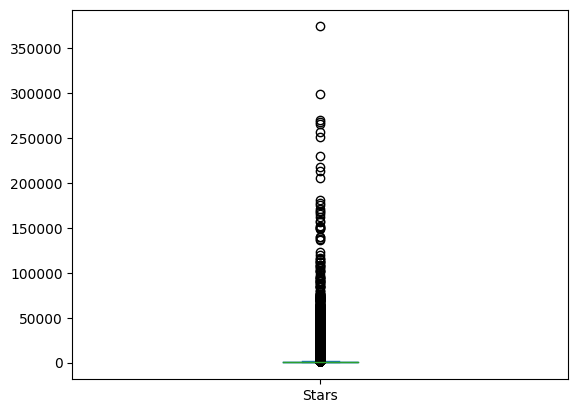

In [27]:
data_raw['Stars'].plot(kind='box')
pass

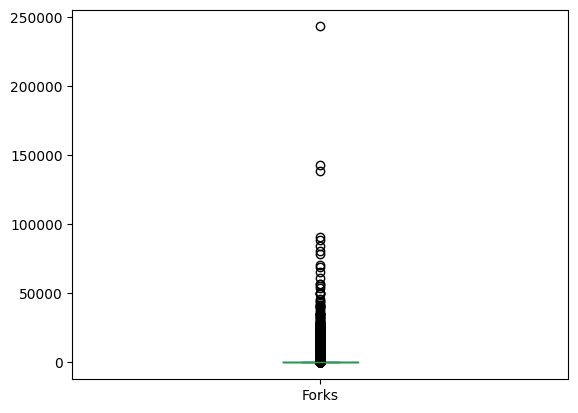

In [28]:
data_raw['Forks'].plot(kind='box')
pass

In [29]:
data_raw['Stars'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      168.00
0.010      169.00
0.050      177.00
0.100      190.00
0.500      377.00
0.900     2010.00
0.950     3761.00
0.990    12923.60
0.995    19809.58
Name: Stars, dtype: float64

Мы видим, например, что $99\%$ всех значений признака `'Stars'` находится в диапазоне от $169$ до $19809$ звёзд. (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соответственно)

In [30]:
data_raw['Forks'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       4.00
0.010       6.00
0.050      14.00
0.100      20.00
0.500      79.00
0.900     411.00
0.950     741.00
0.990    2549.44
0.995    4121.58
Name: Forks, dtype: float64

$99\%$ всех значений `'Forks'` находится в диапазоне от $4$ до $4121$ ответвлений.

Удалим все строки таблицы, в которых `'Stars'` или `'Forks'` выходят за пределы квантилей $0.005$, $0.995$.

In [31]:
rows_to_drop = data_raw[
    (data_raw['Stars'] < data_raw['Stars'].quantile(0.005)) | (data_raw['Stars'] > data_raw['Stars'].quantile(0.995)) |
    (data_raw['Forks']  < data_raw['Forks' ].quantile(0.005)) | (data_raw['Forks']  > data_raw['Forks' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(211514, 24)

In [32]:
#Другой способ:
data = data_raw[
    (data_raw['Stars'] >= data_raw['Stars'].quantile(0.005)) & (data_raw['Stars'] <= data_raw['Stars'].quantile(0.995)) &
    (data_raw['Forks']  >= data_raw['Forks' ].quantile(0.005)) & (data_raw['Forks']  <= data_raw['Forks' ].quantile(0.995))]
data.shape

(211514, 24)

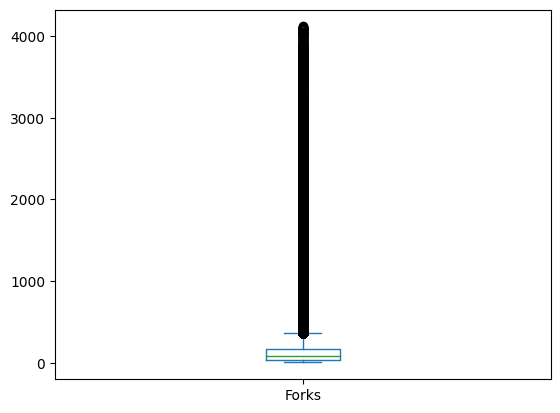

In [33]:
data['Forks'].plot(kind='box')
pass

Другой способ обнаружения выбросов. Можно воспользоваться эвристическим правилом, что все примеры за границами интервала $[Q_1-1.5\cdot{\rm IQR},\, Q_3+1.5\cdot{\rm IQR}]$ являются выбросами.

In [34]:
Q1, Q3 = data_raw['Stars'].quantile([.25, .75])
IQR = Q3 - Q1
stars_lower = Q1 - 1.5*IQR
stars_upper = Q3 + 1.5*IQR

In [35]:
Q1, Q3 = data_raw['Forks'].quantile([.25, .75])
IQR = Q3 - Q1
forks_lower = Q1 - 1.5*IQR
forks_upper = Q3 + 1.5*IQR

In [36]:
rows_to_drop = data_raw[
    (data_raw['Stars'] < stars_lower) | (data_raw['Stars'] > stars_upper) |
    (data_raw['Forks']  < forks_lower)  | (data_raw['Forks']  > forks_upper)].index
data = data_raw.drop(rows_to_drop)
data.shape


(180880, 24)

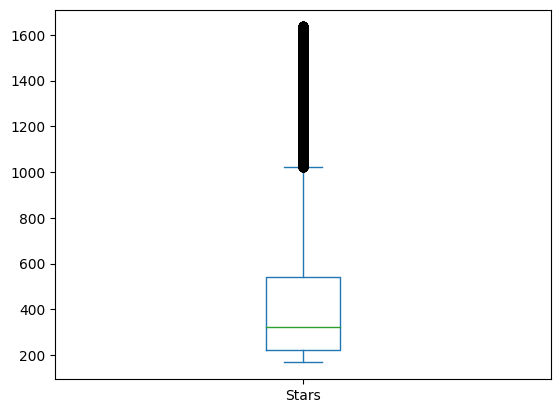

In [37]:
data['Stars'].plot(kind='box')
pass

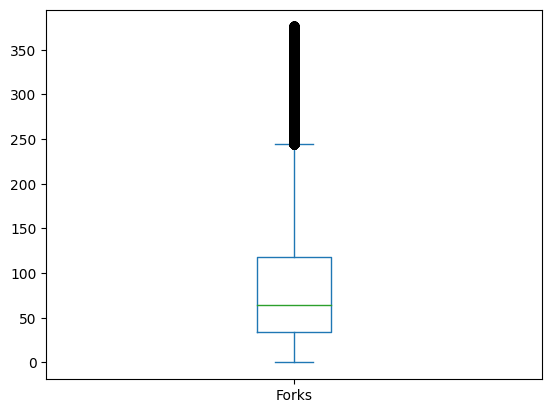

In [38]:
data['Forks'].plot(kind='box')
pass

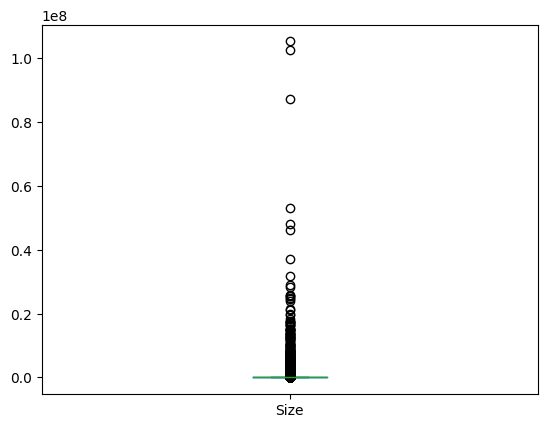

In [39]:
data['Size'].plot(kind='box')
pass

In [40]:
rows_to_drop = data[
    (data['Size'] < data['Size'].quantile(0.005)) | (data['Size'] > data['Size'].quantile(0.995))].index
data = data.drop(rows_to_drop)

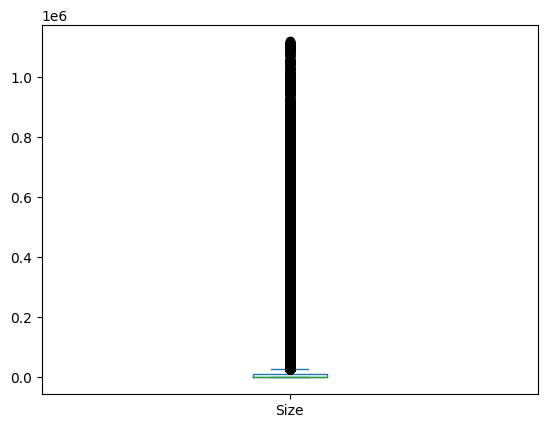

In [41]:
data['Size'].plot(kind='box')
pass

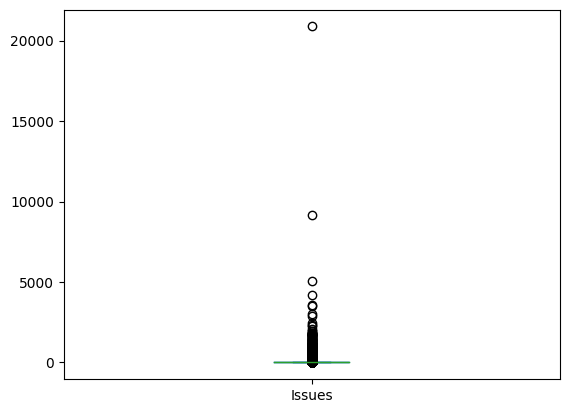

In [42]:
data['Issues'].plot(kind='box')
pass

In [43]:
rows_to_drop = data[
    (data['Issues'] < data['Issues'].quantile(0.005)) | (data['Issues'] > data['Issues'].quantile(0.995))].index
data = data.drop(rows_to_drop)

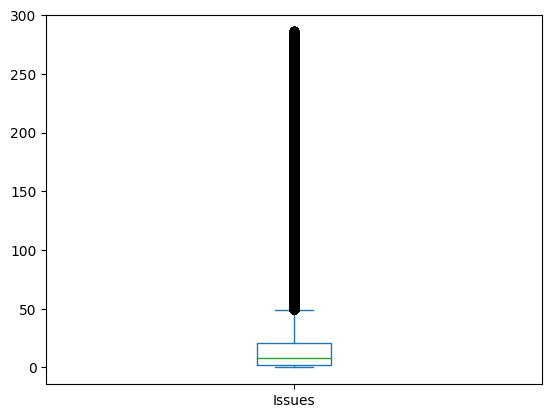

In [44]:
data['Issues'].plot(kind='box')
pass

In [45]:
# Q1, Q3 = data_raw['Size'].quantile([.25, .75])
# IQR = Q3 - Q1
# size_lower = Q1 - 1.5*IQR
# size_upper = Q3 + 1.5*IQR
# rows_to_drop = data_raw[
#     (data_raw['Size'] < size_lower) | (data_raw['Size'] > size_upper)].index
# data = data_raw.drop(rows_to_drop)
# data.shape

In [46]:
data.describe()

,Size,Stars,Forks,Issues,Watchers
count,1.782580e+05,178258.000000,178258.000000,178258.000000,178258.000000
mean,2.492917e+04,439.101920,87.243703,18.591665,439.101920
std,8.294241e+04,307.421076,73.773991,30.745933,307.421076
min,6.000000e+00,167.000000,0.000000,0.000000,167.000000
25%,3.190000e+02,222.000000,34.000000,2.000000,222.000000
50%,1.881000e+03,321.000000,64.000000,8.000000,321.000000
75%,1.169700e+04,541.000000,117.000000,21.000000,541.000000
max,1.119948e+06,1637.000000,376.000000,286.000000,1637.000000


In [47]:
data.describe(include=['category'])

,Name,Description,URL,Created At,Updated At,Homepage,Language,License,Topics,Default Branch
count,178257,171346,178258,178258,178258,59798,165646,132616,178258,178258
unique,166334,170836,178258,178197,163833,57447,347,45,88255,1852
top,dotfiles,Migrated:,https://github.com/0-8-4/miui-auto-tasks,2017-06-05T20:53:58Z,2023-06-22T20:19:05Z,https://spatie.be/open-source,Python,MIT,[],master
freq,182,32,1,3,10,31,29275,65667,87301,136397


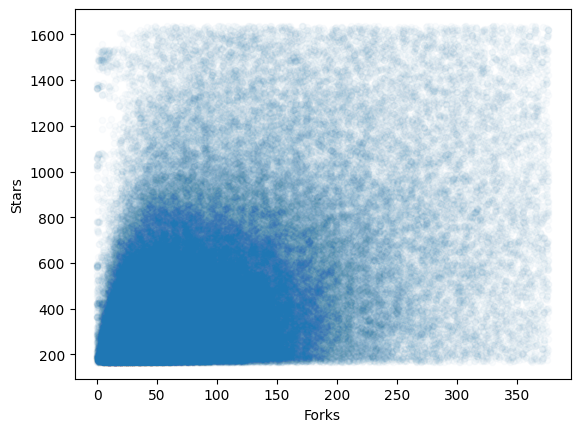

In [48]:
data.plot(kind = 'scatter', x = 'Forks', y = 'Stars', alpha=.02)
pass

Зависимость между `Stars` и `Forks` совершенно не прослеживается.Есть крупный кластер для небольших значений, но понятно, что, чем меньше звёзд и форков, тем больше репозиториев с такими признаками.

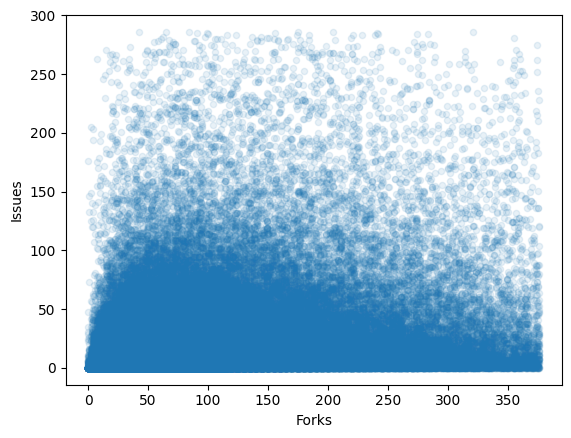

In [49]:
data.plot(kind = 'scatter', x = 'Forks', y = 'Issues', alpha=0.1)
pass

Зависимость между `Stars` и `Issues` также не прослеживается явно.

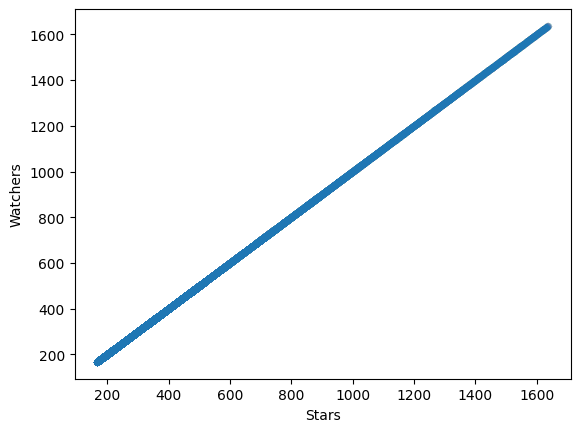

In [50]:
data.plot(kind = 'scatter', x = 'Stars', y = 'Watchers', alpha=0.01)
pass

А вот между `Stars` и `Watchers` идеально чётко видна прямая зависимость. Это и логично: чем больше людей следят за репозиторием, тем больше звёзд можно получить. Однако необычно настолько полное совпадение интуитивной догадки и экспериментальных данных.

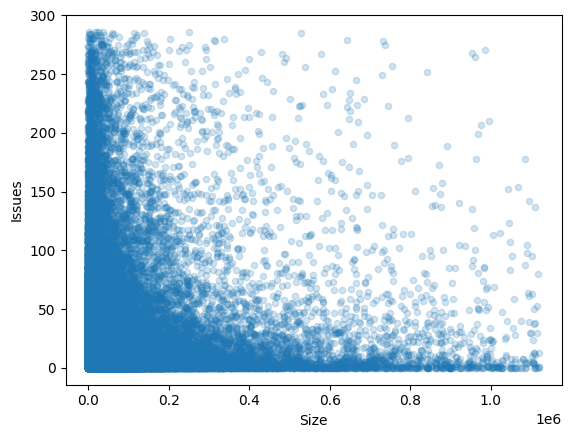

In [51]:
data.plot(kind = 'scatter', x = 'Size', y = 'Issues', alpha=.2)
pass

Зависимость между `Size` и `Issues` напоминает обратную: диаграмма похожа на гиперболу.

Интересно посмотреть, сколько раз номинальные переменные принимают то или иное значение

In [52]:
data['Name'].value_counts()

dotfiles                 182
blog                     147
core                      72
docs                      57
examples                  56
                        ... 
spark-sql-internals        0
GitHubDaily                0
GitHubDesktop_zh           0
GitHubGraduation-2021      0
earlyoom                   0
Name: Name, Length: 196820, dtype: int64

In [53]:
# sns.countplot(x='Language', data=data)
# pass

In [54]:
# data['Building'].value_counts().index

In [55]:
# sns.countplot(x='Building', data=data)
# pass

In [56]:
# sns.countplot(x='Building', order=data['Building'].value_counts().index, data=data)
# pass

In [57]:
# sns.countplot(x='Building', order=data['Building'].value_counts().index, hue='Type', data=data)
# pass

In [58]:
# sns.countplot(x='Type', hue='Building', data=data)
# pass

Для отрисовки диаграммы рассеивания мы можем воспользоваться более продвинутой функцией `scatterplot` из модуля `seaborn`. Например, в следующей диаграмме цвет маркеров соответствует языку программирования `'Language'`, а размер - количеству звёзд `'Stars'`:

In [59]:
# plt.figure(figsize = (10, 8))
# sns.scatterplot(x='Area', y='Price', size='Stars', hue='Language', data=data, alpha=0.1)
# pass

In [60]:
# plt.figure(figsize = (10, 8))
# sns.scatterplot(x='Stars', y='Forks', hue='Language', data=data, alpha=0.5)
# plt.xlim([43.7, 44.1])
# plt.ylim([56.2, 56.4])
# pass

Мы видим, что наблюдается ожидаемая корреляция между количеством комнат и площадью квартиры. Также можно увидеть, что квартиры в панельных домах, как правило, имеют умеренные размеры и умеренные цены. Квартиры в монолитных домах, как правило, больше и дороже. Кирпичные дома бываю в разной ценовой категории, но самые большие и дорогие квартиры - в основном в кирпичных домах.

Построим все возможные диаграммы рассеивания для каждой пары переменных:

In [61]:
# sns.pairplot(data.sample(1000), hue='Building', diag_kind='hist')
# pass

На диаграммах, в частности, наблюдается попарная корреляция между `Price`, `Area` и `Rooms`.

На диагонали расположены гистограммы распределения признаков. Гистограммы можно построить отдельно.

Построить гистограмму можно с помощью функции `plt.hist` или `pd.hist`, но мы воспользуемся `displot` из библиотеки `seaborn`.

In [62]:
# sns.displot(data['Price'], bins=15, kde=True)
# plt.grid()
# pass

Можно представить вместе и диаграмму рассеивания для пары признаков и соответствующие гистограммы:

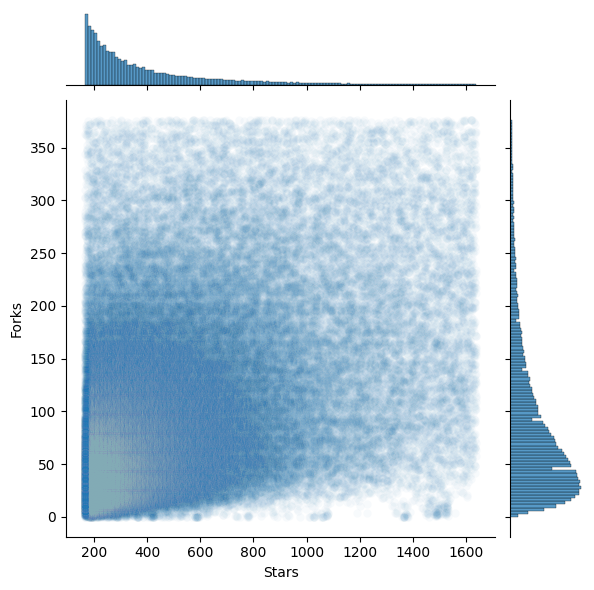

In [63]:
sns.jointplot(x='Stars', y='Forks', alpha=.03, data=data)
pass

In [64]:
# sns.displot(data['Area'], bins = 20, kde=True)
# pass

In [65]:
# sns.displot(data['Date'], bins = 15, kde=True)
# pass

*Ящик с усами* (*бокс-диаграмма*) - это один из возможных способов визуального представления распределения. Нижний и верхний концы ящика соответствуют 1-му и 3-му квартилям (25% и 75% квантилям соответственно), а горизонтальная линия внутри ящика - медиане. Верхний ус продолжается вверх вплоть до максимального значения, но не выше 1.5 межквартильного расстояния от верхней кромки ящика. Аналогично нижний ус - продолжается вниз до минимального значения, но не ниже 1.5 межквартильных расстояний от нижней кромки ящика. На концах усов ставятся небольшие зарубки. За пределами усов значения изображаются в виде отдельных точек - эти значения можно считать выбросами.

In [66]:
# sns.boxplot(x="Stars", y="Forks", data=data)
# pass

In [67]:
# sns.boxplot(x="Building", y="Area", hue="Type", data=data)
# pass

Также информацию о характере распределения можно получить из *скрипичных графиков* (violin plots). В этом случае изображают графики аппроксимации плотности вероятности.

In [68]:
# sns.violinplot(x="Building", y="Price", data=data)
# pass

In [69]:
# sns.violinplot(x="Building", y="Price", hue="Type", split=True, data=data)
# pass

Можно вычислить матрицу корреляции для количественных признаков:

In [70]:
corr_mat = data.corr(numeric_only=True)
corr_mat

,Size,Stars,Forks,Issues,Watchers,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template
Size,1.000000,0.019577,0.092615,0.101870,0.019577,-0.033555,-0.000003,-0.011251,0.002149,0.052047,0.065749,NaN,-0.018583,-0.005490
Stars,0.019577,1.000000,0.481238,0.199972,1.000000,0.000827,-0.059710,-0.012842,-0.063129,0.052707,0.089611,NaN,-0.007469,-0.005561
Forks,0.092615,0.481238,1.000000,0.254536,0.481238,-0.047830,0.031928,-0.030684,0.010077,0.013840,-0.014480,NaN,0.020332,0.015342
Issues,0.101870,0.199972,0.254536,1.000000,0.199972,0.056571,-0.014129,-0.030891,-0.047197,0.095771,0.141969,NaN,-0.006427,-0.022167
Watchers,0.019577,1.000000,0.481238,0.199972,1.000000,0.000827,-0.059710,-0.012842,-0.063129,0.052707,0.089611,NaN,-0.007469,-0.005561
Has Issues,-0.033555,0.000827,-0.047830,0.056571,0.000827,1.000000,0.186303,0.076533,0.227260,0.015896,0.033531,NaN,-0.115056,-0.001366
Has Projects,-0.000003,-0.059710,0.031928,-0.014129,-0.059710,0.186303,1.000000,0.030034,0.616950,-0.035342,-0.117363,NaN,-0.045738,-0.021804
Has Downloads,-0.011251,-0.012842,-0.030684,-0.030891,-0.012842,0.076533,0.030034,1.000000,0.116004,-0.003838,0.004328,NaN,-0.033217,0.003791
Has Wiki,0.002149,-0.063129,0.010077,-0.047197,-0.063129,0.227260,0.616950,0.116004,1.000000,-0.055104,-0.109885,NaN,-0.082815,-0.013110
Has Pages,0.052047,0.052707,0.013840,0.095771,0.052707,0.015896,-0.035342,-0.003838,-0.055104,1.000000,0.091848,NaN,0.006655,0.002265


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

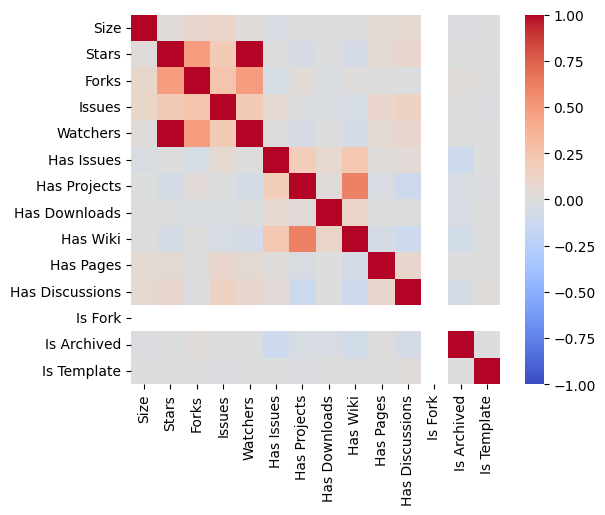

In [71]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

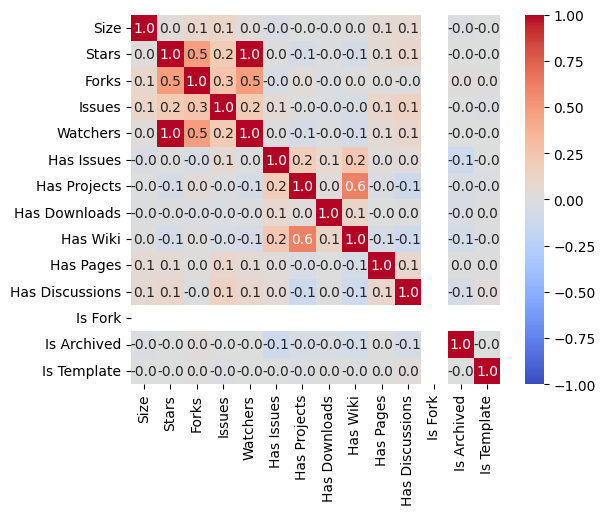

In [72]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.1f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, большие заданного значения:

In [73]:
# corr_mat > 0.5

In [74]:
# np.triu(corr_mat, k=1)

In [75]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack()

Stars         Watchers    1.00000
Has Projects  Has Wiki    0.61695
dtype: float64

In [76]:
corr_mat.where(np.triu(np.abs(corr_mat) > 0.5, k=1)).stack().sort_values(ascending=False)

Stars         Watchers    1.00000
Has Projects  Has Wiki    0.61695
dtype: float64

Достаточно большие значения этих коэффициентов вполне объяснимы.

Обратите внимание на небольшую корреляцию между ценой квартиры и географическими координатами (квартиры в нагорной части и особенно в нижегородском районе - дороже):

In [77]:
corr_mat.loc['Stars', 'Forks'], corr_mat.loc['Stars', 'Watchers']

(0.48123785956662807, 1.0)

Также обратите внимание, что коэффициент корреляции между `'Stars'`, `'Size'` практически равен нулю

In [78]:
corr_mat.loc['Stars', 'Size']

0.01957666647989273

Например, выберем все данные, соответствующие квартирам в деревянных строениях ценой больше 3 млн. и выше:

In [79]:
# data.loc[(data['Building']=='Wooden') & (data['Price'] >= 3000), :]

Или все данные, соответствующие продажам в деревянных новостройках:

In [80]:
# data.loc[(data['Building']=='Wooden') & (data['Type']=='New'), :]

Значения, которые принимают категориальные признаки, можно получить следующим образом:

In [81]:
data['Language'].unique()

['HTML', 'JavaScript', 'Go', 'HCL', 'Kotlin', ..., 'PogoScript', 'Inform 7', 'Modula-2', 'Bison', 'Red']
Length: 348
Categories (369, object): ['1C Enterprise', 'ABAP', 'AGS Script', 'AL', ..., 'q', 'reStructuredText', 'sed',
                           'wisp']

##  3. Создание корректной выборки

In [495]:
data.isna().sum()

Name                    1
Description          6020
URL                     0
Created At              0
Updated At              0
Homepage           108432
Size                    0
Stars                   0
Forks                   0
Issues                  0
Watchers                0
Language                0
License             37984
Topics                  0
Has Issues              0
Has Projects            0
Has Downloads           0
Has Wiki                0
Has Pages               0
Has Discussions         0
Is Fork                 0
Is Archived             0
Is Template             0
Default Branch          0
dtype: int64

In [496]:
data.dropna(subset=['Language'], inplace=True)

Для предсказания количества форков у репозитория (`Forks`) будем использовать все входные признаки, кроме `Size` (нулевая корреляция), `Is Fork` (корреляция даёт NaN значения + все значения в данном столбце равны `False`). Также удалим те столбцы, которые не влияют на решение, но обладают большим количеством уникальных значений (чтобы при бинаризации всё не упало из-за недостатка памяти).

In [536]:
X = data.drop(['Forks',  'Is Fork'], axis=1)
y = data['Forks']
#X = X.drop(['Name', 'Description', 'URL', 'Created At', 'Updated At', 'Homepage', 'Topics', 'Default Branch'], axis=1)
X = X.drop(['Name', 'Description', 'URL', 'Created At', 'Updated At', 'Homepage', 'Topics', 'Default Branch', 'Has Issues', 'Has Projects', 'Has Downloads', 'Has Wiki', 'Has Pages','Has Discussions', 'Is Archived', 'Is Template'], axis=1)

pass

In [537]:
X.isna().sum()

Size            0
Stars           0
Issues          0
Watchers        0
Language        0
License     37984
dtype: int64

С пропущенными значениями надо что-то сделать. Например, можно просто удалить строки с пропущенными значениями.

Простая разумная стратегия для удаления пропущенных значений в строках - заполнить пропущенные значения медианой или средним (для количественных признаков) или модой (для номинальных признаков).

In [85]:
# from sklearn.impute import SimpleImputer
# imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
# imp_num.fit(X_train[['Floors', 'Rooms', 'Floor', 'Area']])

In [86]:
# X_train[['Floors', 'Rooms', 'Floor', 'Area']] = imp_num.transform(X_train[['Floors', 'Rooms', 'Floor', 'Area']])

Пропущенные значения в тестовой выборке заменим на:
- Те, что чаще всего встречались (`Lisence`).
- Отдельное значение `Other` (`Language`).

In [540]:
from sklearn.impute import SimpleImputer
imp_cat_license = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat_language = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Other')
# imp_cat.fit(X[['Language', 'License']])
imp_cat_license.fit(X[['License']])
#imp_cat_language.fit(X[['Language']])

SimpleImputer(strategy='most_frequent')

In [541]:
# X[['Language', 'License']]=imp_cat.transform(X[['Language', 'License']])
X[['License']]=imp_cat_license.transform(X[['License']])
#X[['Language']]=imp_cat_language.transform(X[['Language']])

In [542]:
X.shape

(165646, 6)

In [543]:
X.isna().sum()

Size        0
Stars       0
Issues      0
Watchers    0
Language    0
License     0
dtype: int64

# 5. Объединение категорий

Объединим некоторые категории в `Languages`.

In [544]:
top_20_languages = X['Language'].value_counts().nlargest(20).index

In [545]:
X['Language'].where(X['Language'].isin(top_20_languages),'Other')
pass

In [546]:
X['Language']=X['Language'].where(X['Language'].isin(top_20_languages),'Other')
X['Language'].value_counts()

Python              29275
JavaScript          26242
Other               15791
Java                12142
C++                  9458
TypeScript           9385
Go                   8599
C                    7418
C#                   6222
PHP                  5643
Shell                4428
HTML                 4195
Ruby                 4000
Objective-C          3989
Rust                 3901
Swift                3799
Jupyter Notebook     3572
Kotlin               2376
CSS                  2183
Vue                  1519
Dart                 1509
Name: Language, dtype: int64

In [506]:
X.shape

(165646, 4)

In [547]:
X['Language'] = X['Language'].astype('category')
X['License'] = X['License'].astype('category')

## 6. Бинаризация номинальных признаков

Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков.

Бинарный признак `'Type'` заменим на числовой.

`'Resale'` → 0, `'New'`→ 1

К категориальным (небинарным) признакам применим метод *бинаризации* (*one-hot encoding*),
который заключается в следующем.
Для примера возьмём задачу с определением цены на квартиры 😀:

Признак `'Building'` принимает 5 значений: `'Block'`, `'Brick'`, `'Monolithic'`, `'Panel'`, `'Wooden'`.

Вместо признака `'Building'` будем использовать 5 новых признаков (dummy-признаков, dummy - фиктивный), которые так и назовем `'Building_Block'`, `'Building_Brick'`, `'Building_Monolithic'`, `'Building_Panel'`, `'Building_Wooden'`. При этом
- если признак `'Building'` принимает значение `'Block'`, то признак `'Building_Block'` равен 1, а все остальные 0;
- если признак `'Building'` принимает значение `'Brick'`, то признак `'Building_Brick'` равен 1, а все остальные 0
- и т.д.

In [508]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165646 entries, 26731 to 215027
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   Stars     165646 non-null  int64   
 1   Issues    165646 non-null  int64   
 2   Language  165646 non-null  category
 3   License   165646 non-null  category
dtypes: category(2), int64(2)
memory usage: 4.1 MB


In [548]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
# enc.fit(X[['Language', 'License', 'Has Issues', 'Has Projects', 'Has Downloads', 'Has Wiki', 'Has Pages','Has Discussions', 'Is Archived', 'Is Template']])
enc.fit(X[['Language', 'License']])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [549]:
# dummies = pd.DataFrame(enc.transform(X[['Language', 'License', 'Has Issues', 'Has Projects', 'Has Downloads', 'Has Wiki', 'Has Pages','Has Discussions', 'Is Archived', 'Is Template']]),
#                        columns=enc.get_feature_names_out(), index=X.index)
dummies = pd.DataFrame(enc.transform(X[['Language', 'License']]),
                       columns=enc.get_feature_names_out(), index=X.index)
dummies.head()

,Language_C,Language_C#,Language_C++,Language_CSS,Language_Dart,Language_Go,Language_HTML,Language_Java,Language_JavaScript,Language_Jupyter Notebook,...,License_NOASSERTION,License_ODbL-1.0,License_OFL-1.1,License_OSL-3.0,License_PostgreSQL,License_UPL-1.0,License_Unlicense,License_Vim,License_WTFPL,License_Zlib
26731,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26733,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26734,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Добавим эти dummy-столбцы к таблице и удалим столбцы `Language`, `License`:

In [550]:
# X = pd.concat((X, dummies), axis=1).drop(['Language', 'License', 'Has Issues', 'Has Projects', 'Has Downloads', 'Has Wiki', 'Has Pages','Has Discussions', 'Is Archived', 'Is Template'], axis=1)
X = pd.concat((X, dummies), axis=1).drop(['Language', 'License'], axis=1)

In [551]:
X.head()

,Size,Stars,Issues,Watchers,Language_C,Language_C#,Language_C++,Language_CSS,Language_Dart,Language_Go,...,License_NOASSERTION,License_ODbL-1.0,License_OFL-1.1,License_OSL-3.0,License_PostgreSQL,License_UPL-1.0,License_Unlicense,License_Vim,License_WTFPL,License_Zlib
26731,35366,1637,101,1637,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26732,780,1637,37,1637,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26733,376,1637,7,1637,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26734,395,1637,6,1637,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26735,157,1637,1,1637,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [513]:
X.isna().sum().sum()

0

# 7. Обучающая и тестовая выборка

Теперь мы можем разделить на две выборки, потому что до этого из-за наличия выбросов, пропущенных значений, небинаризованных категориальных признаков могли возникать проблемы. Наименее очевидной оказалась проблема, связанная с бинаризацией категориальных признаков. При наличии большого количества уникальных значений, почти $100\%$-ная вероятность того, что в выборках будут разные бинаризованные значения, которые будут неприводимы друг к другу. А добавление из общей выборки меняет всю картину.

Разобьём данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [552]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(124234, 41412)

## 8. Масштабирование количественных признаков

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из трех следующих способов:
- *приведение к отрезку $[0,1]$* - это линейное преобразование, приводящее все значения к заданному отрезку;
- *стандартизация* - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению;
- *нормализация* - приведение данных к единичной норме.

Выполним стандартизацию всех признаков:

In [553]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [554]:
X_train.describe()

,Size,Stars,Issues,Watchers,Language_C,Language_C#,Language_C++,Language_CSS,Language_Dart,Language_Go,...,License_NOASSERTION,License_ODbL-1.0,License_OFL-1.1,License_OSL-3.0,License_PostgreSQL,License_UPL-1.0,License_Unlicense,License_Vim,License_WTFPL,License_Zlib
count,1.242340e+05,1.242340e+05,1.242340e+05,1.242340e+05,1.242340e+05,1.242340e+05,1.242340e+05,1.242340e+05,1.242340e+05,1.242340e+05,...,1.242340e+05,1.242340e+05,1.242340e+05,1.242340e+05,1.242340e+05,1.242340e+05,1.242340e+05,1.242340e+05,1.242340e+05,1.242340e+05
mean,-1.544235e-17,-3.217157e-17,2.962644e-17,-3.217157e-17,1.061519e-16,9.036637e-17,-3.220017e-17,-1.344057e-18,3.803395e-18,-1.695799e-17,...,-3.151384e-17,-1.072386e-19,-1.020911e-17,-2.773904e-18,2.974083e-18,-7.778371e-18,1.086684e-17,-2.101876e-18,1.212511e-17,-1.149597e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-3.052856e-01,-8.842720e-01,-6.227812e-01,-8.842720e-01,-2.161248e-01,-1.981595e-01,-2.472646e-01,-1.155538e-01,-9.559416e-02,-2.329762e-01,...,-3.245669e-01,-2.837145e-03,-2.216416e-02,-1.418709e-02,-1.098883e-02,-8.972165e-03,-7.291449e-02,-4.914119e-03,-3.624588e-02,-3.186291e-02
25%,-3.008693e-01,-7.051425e-01,-5.265680e-01,-7.051425e-01,-2.161248e-01,-1.981595e-01,-2.472646e-01,-1.155538e-01,-9.559416e-02,-2.329762e-01,...,-3.245669e-01,-2.837145e-03,-2.216416e-02,-1.418709e-02,-1.098883e-02,-8.972165e-03,-7.291449e-02,-4.914119e-03,-3.624588e-02,-3.186291e-02
50%,-2.802517e-01,-3.859663e-01,-3.341416e-01,-3.859663e-01,-2.161248e-01,-1.981595e-01,-2.472646e-01,-1.155538e-01,-9.559416e-02,-2.329762e-01,...,-3.245669e-01,-2.837145e-03,-2.216416e-02,-1.418709e-02,-1.098883e-02,-8.972165e-03,-7.291449e-02,-4.914119e-03,-3.624588e-02,-3.186291e-02
75%,-1.555319e-01,3.305516e-01,8.278213e-02,3.305516e-01,-2.161248e-01,-1.981595e-01,-2.472646e-01,-1.155538e-01,-9.559416e-02,-2.329762e-01,...,-3.245669e-01,-2.837145e-03,-2.216416e-02,-1.418709e-02,-1.098883e-02,-8.972165e-03,-7.291449e-02,-4.914119e-03,-3.624588e-02,-3.186291e-02
max,1.358793e+01,3.903371e+00,8.549542e+00,3.903371e+00,4.626957e+00,5.046440e+00,4.044251e+00,8.653974e+00,1.046089e+01,4.292284e+00,...,3.081028e+00,3.524670e+02,4.511788e+01,7.048659e+01,9.100147e+01,1.114558e+02,1.371469e+01,2.034953e+02,2.758934e+01,3.138446e+01


# 9. Обучаем модель

## Линейная регрессия

- Создаем модель и задаем гиперпараметры (конструктор)
- Тренируем модель (метод `fit`)
- Используем модель на новых данных (метод `predict`) и измеряем качество модели

Ищем коэффициенты (веса) $\beta_0, \beta_1, \dots, \beta_d$ _линейной модели_
$$
f(x) = \beta_0 + \sum_{j=1}^d \beta_j x_j,
$$
минимизирующие остаточную сумму квадратов
$$
{\rm RSS} = \sum_{i=1}^N \left(f(x^{(i)}) - y^{(i)}\right)^2
$$

In [555]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [556]:
y_train_predict = model.predict(X_train)

In [557]:
model.coef_

array([ 3.99878103e+00,  4.06314584e+14,  1.24657378e+01, -4.06314584e+14,
       -4.35484314e+13, -4.02144385e+13, -4.91454850e+13, -2.40501673e+13,
       -1.99790578e+13, -4.66069571e+13, -3.33545071e+13, -5.51148160e+13,
       -7.70621137e+13, -3.07249408e+13, -2.51332766e+13, -3.21331780e+13,
       -6.18292893e+13, -3.83623726e+13, -8.03049844e+13, -3.24183304e+13,
       -3.20800651e+13, -3.40192533e+13, -3.16516258e+13, -4.86524354e+13,
       -1.99966467e+13, -2.41609478e+13, -9.73067405e+12, -1.44100797e+14,
       -4.66858766e+14, -1.86316223e+13, -1.39079580e+14, -2.18957902e+14,
       -1.63784399e+13, -1.58894846e+13, -4.27665220e+13, -4.78088389e+13,
       -3.85014735e+13, -7.98171557e+13, -3.97261099e+12, -3.49160939e+13,
       -3.97261099e+12, -3.97261099e+12, -6.05826278e+13, -3.29899529e+13,
       -5.61809773e+12, -1.53849892e+13, -3.97261099e+12, -1.81765854e+14,
       -3.38275205e+14, -9.39639798e+13, -7.90274589e+13, -1.06580535e+14,
       -2.02543827e+13, -

In [558]:
max(model.coef_)

406314583728905.7

In [559]:
min(abs(model.coef_))

0.010289500467479229

In [560]:
y_train

122173     26
79622      52
32020      97
86342      36
115360    315
         ... 
164993     20
147243     10
178177     37
194569     23
167262    202
Name: Forks, Length: 124234, dtype: int64

In [561]:
max(y_train_predict), min(y_train_predict), max(y_train), max(y_train_predict-y_train)**2

(349.50449898498266, -38.99550101501731, 376, 62815.14576146343)

In [562]:
RSS = ((y_train_predict - y_train)**2).sum()
RSS/N_train, (RSS/N_train)**.5

(3789.236201532469, 61.55677218253463)

# 10.Тестируем модель

In [563]:
# Заполнение пропущенных значений:
# X_test[['Floors', 'Rooms', 'Floor', 'Area']] = imp_num.transform(
#     X_test[['Floors', 'Rooms', 'Floor', 'Area']])

# X_test[['Language', 'License']] = imp_cat.transform(X_test[['Language', 'License']])

# One-hot encoding:

# dummies = pd.DataFrame(enc.transform(X_test[['Language', 'License']]),
#                        columns=enc.get_feature_names_out(), index=X_test.index)
# X_test = pd.concat((X_test, dummies), axis=1).drop(['Language', 'License'], axis=1)

# Масштабирование:
X_test = pd.DataFrame(scaler.transform(X_test),
                      columns=X_test.columns, index=X_test.index)

In [564]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [565]:
max(y_test_predict), min(y_test_predict), max(y_test), max(y_test_predict-y_test)**2

(1400225626378531.0, -10.834856483767311, 376, 1.9606318047669648e+30)

### Измеряем метрики качества

*Остаточная сумма квадратов* (*residual sum of squares*):
$$
{\rm RSS} = \sum_{i=1}^N \left(y^{(i)} - \widehat{y}^{(i)} \right)^2
$$
где
$$
\widehat{y}^{(i)} = \beta_0 + \sum_{j=1}^d \beta_j x_j^{(i)}
$$

*Полная сумма квадратов*:
$$
{\rm TSS} = \sum_{i=1}^N \left(y^{(i)} - \overline{y} \right)^2,
$$
где
$$
\overline{y} = \frac{1}{N} \sum_{i=1}^N y^{(i)}
$$

$$
\overline{y} = \beta_0 + \sum_{j=1}^d \beta_j \overline{x}_j
$$


*Сумма квадратов, обусловленная регрессией*:
$$
{\rm ESS} = \sum_{i=1}^N \left(\overline{y} - \widehat{y}^{(i)} \right)^2
$$

Можно показать, что
$$
{\rm TSS} = {\rm RSS} + {\rm ESS}
$$

*Коэффициент детерминации*, или *коэффициент регрессии Пирсона*:
$$
R^2 = 1 - \frac{{\rm RSS}}{{\rm TSS}} = \frac{{\rm ESS}}{{\rm TSS}}
$$
— доля объясняемого регрессией разброса относительно среднего (чем ближе к 1, тем модель лучше объясняет данные).

$$
0 \le R^2 \le 1
$$

$R = \sqrt{R^2}$ равно (по модулю) выборочной корреляции между $y^{(i)}$ и $\widehat{y}^{(i)}$

Если $d = 1$, то $R$ равен (по модулю) выборочной корреляции между $y^{(i)}$ и $x^{(i)}$.

*Средняя сумма квадратов отклонений* (MSE - Mean Squared Error)
$$
{\rm MSE} = \frac{1}{N} {\rm RSS} = \frac{1}{N} \sum_{i=1}^N \left(y^{(i)} - \widehat{y}^{(i)} \right)^2
$$

*Среднеквадратическая ошибка* (RMSE - Rooted Mean Squared Error)
$$
{\rm RMSE} = \sqrt{{\rm MSE}}
$$

MSE иногда называют *средней квадратической ошибкой*, что, конечно же, правильней отражает суть дела, но добавляет путаницы.

Для вычисления этих метрик можно воспользоваться соответствующими функциями из модуля `metrics` библиотеки `sklearn`, но можно также вычислить "вручную". Значение $R^2$ также вычисляет метод `score` объекта `LinearRegression`

In [566]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(3789.236201532469,
 9.235733421091027e+25,
 0.3092319044252302,
 -1.7271524030912532e+22)

In [567]:
model.score(X_train, y_train) # Коэффициент детерминации R^2

0.3092319044252302

In [568]:
model.score(X_test, y_test)

-1.7271524030912532e+22

In [569]:
#MSE_train = np.mean((y_train_predict - y_train)**2)
#MSE_test  = np.mean((y_test_predict - y_test)**2)
MSE_train = ((y_train_predict - y_train)**2).mean()
MSE_test  = ((y_test_predict - y_test)**2).mean()
MSE_train, MSE_test

(3789.236201532469, 9.235733421091027e+25)

In [570]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test

(61.55677218253463, 9610272327614.357)

In [571]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['Linear Regression, all features', :] = (RMSE_train, RMSE_test)

In [572]:
RMSE_table

,train,test
"Linear Regression, all features",61.556772,9610272327614.357422


In [573]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['Linear Regression, all features', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.309232,-17271524030912531529728.0


Совершенно неработоспособный метод в данном случае.

### Если предсказывать `Forks` только по `Stars`?

Попробуем построить линейную модель, описывающую зависимость `Forks` только от `Stars`

In [574]:
model = LinearRegression()
model.fit(X_train[['Stars']], y_train)

y_train_predict = model.predict(X_train[['Stars']])
y_test_predict  = model.predict(X_test[['Stars']])

In [575]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

In [576]:
RMSE_table.loc['Linear Regression, Stars', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",61.556772,9610272327614.357422
"Linear Regression, Forks",64.941454,64.151778


In [577]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, Stars', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.309232,-17271524030912531529728.0
"Linear Regression, Stars",0.23118,0.230379


### Как `Forks` зависит от `Issues`?

Попробуем построить линейную модель, описывающую зависимость `Forks` только от `Issues`

In [578]:
model = LinearRegression()
model.fit(X_train[['Issues']], y_train)

y_train_predict = model.predict(X_train[['Issues']])
y_test_predict  = model.predict(X_test[['Issues']])

In [579]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

In [580]:
RMSE_table.loc['Linear Regression, Issues', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",61.556772,9610272327614.357422
"Linear Regression, Forks",64.941454,64.151778
"Linear Regression, Issues",71.439368,70.457568


In [582]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, Issues', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.309232,-17271524030912531529728.0
"Linear Regression, Stars",0.23118,0.230379
"Linear Regression, Issues",0.06963,0.071644


### Как `Forks` зависит от `Stars` и `Issues`?

Попробуем построить линейную модель, описывающую зависимость `Forks` от `Stars` и `Issues`

In [583]:
model = LinearRegression()
model.fit(X_train[['Stars', 'Issues']], y_train)

y_train_predict = model.predict(X_train[['Stars', 'Issues']])
y_test_predict  = model.predict(X_test[['Stars', 'Issues']])

In [584]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

In [585]:
RMSE_table.loc['Linear Regression, Stars & Issues', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",61.556772,9610272327614.357422
"Linear Regression, Forks",64.941454,64.151778
"Linear Regression, Issues",71.439368,70.457568
"Linear Regression, Stars & Issues",63.790425,62.877611


In [238]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, Stars & Issues', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.316175,-1648800139648335872000.0
"Linear Regression, Forks",0.230651,0.234375
"Linear Regression, Issues",0.064622,0.065149
"Linear Regression, Stars & Issues",0.256454,0.261398


## 10.1 Метод $k$ ближайших соседей ($k$NN, $k$ nearest neighbours)

In [528]:
from sklearn.neighbors import KNeighborsRegressor
best_RMSE_train = 55.191587
best_k = 7
for neighbors in range(5, 15):
  model = KNeighborsRegressor(n_neighbors=neighbors) # по умолчанию n_neighbors=5
  model.fit(X_train, y_train)

  y_train_predict = model.predict(X_train)
  y_test_predict  = model.predict(X_test)

  RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
  if RMSE_train < best_RMSE_train:
    print(neighbors)
    best_RMSE_train = RMSE_train
    best_k = neighbors
  else:
    continue
  RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
  R2_train = r2_score(y_train, y_train_predict)
  R2_test  = r2_score(y_test,  y_test_predict)

5


In [529]:
RMSE_table.loc['k Nearest Neighbours', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",61.541157,5023786152734.28125
k Nearest Neighbours,58.238966,132.59913


In [530]:
R2_table.loc['k Nearest Neighbours', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.320295,-404787215757046072766917246976.0
k Nearest Neighbours,0.470014,-2.288067


## 10.2 Полносвязная нейронная сеть (Full-connected Neural Network)

Full connected neural network, or multi-layer perceptron

In [586]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(20,10))
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(20, 10))

In [587]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [588]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [589]:
RMSE_table.loc['Neural Network', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",61.556772,9610272327614.357422
"Linear Regression, Forks",64.941454,64.151778
"Linear Regression, Issues",71.439368,70.457568
"Linear Regression, Stars & Issues",63.790425,62.877611
Neural Network,59.870491,59.330544


In [590]:
R2_table.loc['Neural Network', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.309232,-17271524030912531529728.0
"Linear Regression, Stars",0.23118,0.230379
"Linear Regression, Issues",0.06963,0.071644
Neural Network,0.346559,0.341712


## 10.3 Случайный лес (Random Forest)

In [591]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [592]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [593]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [594]:
RMSE_table.loc['Random Forest', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",61.556772,9610272327614.357422
"Linear Regression, Forks",64.941454,64.151778
"Linear Regression, Issues",71.439368,70.457568
"Linear Regression, Stars & Issues",63.790425,62.877611
Neural Network,59.870491,59.330544
Random Forest,23.235035,61.314593


In [595]:
R2_table.loc['Random Forest', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.309232,-17271524030912531529728.0
"Linear Regression, Stars",0.23118,0.230379
"Linear Regression, Issues",0.06963,0.071644
Neural Network,0.346559,0.341712
Random Forest,0.901584,0.296949


Метод Random Forest позволяет получить некоторые оценки "*важности*" признаков.
Чем значение больше, тем признак важнее.

In [596]:
importances = model.feature_importances_
importances

array([2.29864834e-01, 2.08156412e-01, 1.46293958e-01, 2.14083174e-01,
       5.96801357e-03, 5.37288794e-03, 6.98822689e-03, 3.89567977e-03,
       2.86548063e-03, 5.58707798e-03, 5.92839150e-03, 1.40815309e-02,
       1.04069947e-02, 6.33204001e-03, 3.03465948e-03, 3.37460770e-03,
       8.54757562e-03, 6.40306494e-03, 9.67615902e-03, 4.19355017e-03,
       8.69155046e-03, 5.15176076e-03, 5.19299866e-03, 7.82007346e-03,
       2.39723228e-03, 1.84371539e-04, 6.42668884e-06, 2.70384067e-03,
       1.16551518e-02, 2.00621009e-05, 2.24678146e-03, 4.44138081e-03,
       2.36173630e-05, 1.81591090e-05, 1.80325381e-04, 1.01953296e-03,
       3.23894966e-04, 1.14981801e-03, 5.01494446e-07, 0.00000000e+00,
       2.54594133e-06, 1.71034971e-06, 3.79612918e-04, 1.04519919e-04,
       3.52092726e-07, 1.07433667e-05, 6.70926904e-07, 3.74156623e-03,
       8.09458627e-03, 1.04318179e-03, 1.71813927e-03, 1.97956725e-03,
       2.71980791e-05, 1.43676776e-02, 6.90497922e-04, 1.06669573e-03,
      

In [597]:
np.sum(importances)

1.0

In [598]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

Size                      2.298648e-01
Watchers                  2.140832e-01
Stars                     2.081564e-01
Issues                    1.462940e-01
License_MIT               1.436768e-02
                              ...     
License_GFDL-1.3          6.709269e-07
License_CECILL-2.1        5.014944e-07
License_EUPL-1.1          3.520927e-07
License_MS-RL             0.000000e+00
License_CERN-OHL-P-2.0    0.000000e+00
Length: 70, dtype: float64

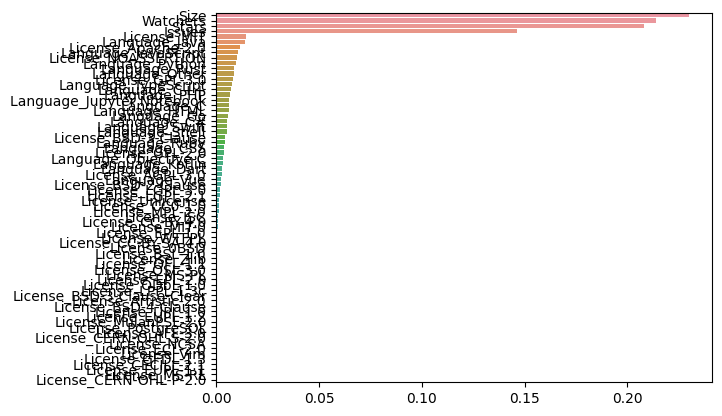

In [599]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

## 10.4 Градиентный бустинг (Gradient Boosting)

In [600]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200)

In [601]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [602]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [603]:
RMSE_table.loc['Gradient Boosting', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",61.556772,9610272327614.357422
"Linear Regression, Forks",64.941454,64.151778
"Linear Regression, Issues",71.439368,70.457568
"Linear Regression, Stars & Issues",63.790425,62.877611
Neural Network,59.870491,59.330544
Random Forest,23.235035,61.314593
Gradient Boosting,59.98139,59.282275


In [604]:
R2_table.loc['Gradient Boosting', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.309232,-17271524030912531529728.0
"Linear Regression, Stars",0.23118,0.230379
"Linear Regression, Issues",0.06963,0.071644
Neural Network,0.346559,0.341712
Random Forest,0.901584,0.296949
Gradient Boosting,0.344136,0.342783


In [605]:
importances = model.feature_importances_
importances

array([3.69140226e-02, 5.18085520e-01, 9.86080689e-02, 1.94114093e-01,
       1.31876909e-04, 2.61954521e-05, 1.04235098e-03, 6.42343097e-04,
       8.55380487e-04, 8.86645520e-03, 3.18970486e-03, 3.47813483e-02,
       1.47910548e-03, 1.23046982e-02, 4.89868020e-03, 9.72104736e-04,
       4.57496664e-03, 2.96913242e-03, 3.63739343e-03, 8.99200367e-04,
       2.58197927e-02, 4.14963899e-04, 1.35726509e-02, 1.69958292e-02,
       9.80796440e-05, 2.87936395e-05, 0.00000000e+00, 6.57497877e-04,
       2.50125250e-03, 0.00000000e+00, 0.00000000e+00, 4.91209512e-05,
       0.00000000e+00, 0.00000000e+00, 2.08702345e-04, 6.84296032e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.32645418e-04, 7.36332306e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.77042541e-03, 3.43891644e-04, 1.70388699e-04, 1.50291179e-04,
       0.00000000e+00, 1.17025335e-03, 7.78441072e-04, 8.23998958e-04,
      

In [606]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

Stars                     0.518086
Watchers                  0.194114
Issues                    0.098608
Size                      0.036914
Language_Java             0.034781
                            ...   
License_EUPL-1.1          0.000000
License_ECL-2.0           0.000000
License_CERN-OHL-S-2.0    0.000000
License_CERN-OHL-P-2.0    0.000000
License_BSD-4-Clause      0.000000
Length: 70, dtype: float64

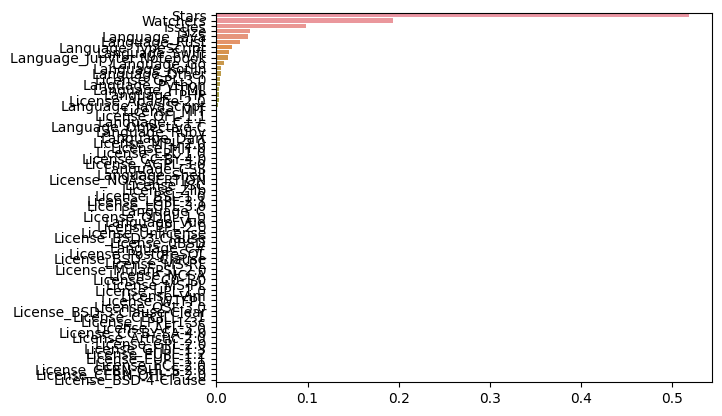

In [607]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

# 11. Использование Pipeline

`Pipeline` - удобный инструмент, позволяющий соединять вместе предобработку и основные методы модели

In [ ]:
X = data_raw.drop(['Price'], axis=1)
y = data_raw['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector

In [ ]:
!pip install feature_engine
from feature_engine.selection import DropFeatures

## 11.1 Линейная регрессия

In [ ]:
ppl = Pipeline([
    # Удаляем нерелевантный признак:
    ('drop_column', DropFeatures(['Date'])),
    # Заполнение пропущенных значений:
    ('impute', ColumnTransformer([
        # Заполнение пропущенных числовых признаков:
        ('num', make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler()),
            make_column_selector(dtype_include='float')
        ),
        # Заполнение пропущенных категориальных признаков:
        ('cat', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder()),
            make_column_selector(dtype_include='category')
        )])
    ),
    # Добавляем новые признаки:
    ('poly_feature', PolynomialFeatures(degree=3)),
    # Обучение:
    ('fit', LinearRegression())
])

In [ ]:
ppl.fit(X_train, y_train)
y_train_predict = ppl.predict(X_train)
y_test_predict = ppl.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
RMSE_train, RMSE_test

## 11.2 *k*NN

In [ ]:
ppl = Pipeline([
    # Удаляем нерелевантный признак:
    ('drop_column', DropFeatures(['Date'])),
    # Заполнение пропущенных значений:
    ('impute', ColumnTransformer([
        # Заполнение пропущенных числовых признаков:
        ('num', make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler()),
            make_column_selector(dtype_include='float')
        ),
        # Заполнение пропущенных категориальных признаков:
        ('cat', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder()),
            make_column_selector(dtype_include='category')
        )])
    ),
    # Обучение:
    ('fit', KNeighborsRegressor())
])

## Подбор гиперпараметров

In [ ]:
from sklearn.model_selection import GridSearchCV

k_arr = np.array([1, 2, 3, 4, 5, 7, 10, 15, 20, 30, 40, 50])

params = {
    'fit__n_neighbors': k_arr,
}

model = GridSearchCV(ppl, params, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

model.best_score_, model.best_params_

In [ ]:
MSE_arr = -model.cv_results_['mean_test_score']
std_arr = model.cv_results_['std_test_score']
plt.plot(k_arr, MSE_arr, 'r.-')
plt.fill_between(k_arr, MSE_arr - std_arr, MSE_arr + std_arr, alpha=0.15, facecolor='red')
plt.xlim([max(k_arr), 0])
plt.grid()
plt.xlabel('k')
plt.ylabel('MSE')
pass

Теперь обучим модель при найденом оптимальном значении гиперпараметра:

In [ ]:
ppl.set_params(fit__n_neighbors=model.best_params_['fit__n_neighbors'])
ppl.fit(X_train, y_train)
y_train_predict = ppl.predict(X_train)
y_test_predict = ppl.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
RMSE_train, RMSE_test

## 11.3 Random Forests

In [ ]:
ppl = Pipeline([
    # Удаляем нерелевантный признак:
    ('drop_column', DropFeatures(['Date'])),
    # Заполнение пропущенных значений:
    ('impute', ColumnTransformer([
        # Заполнение пропущенных числовых признаков:
        ('num', make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler()),
            make_column_selector(dtype_include='float')
        ),
        # Заполнение пропущенных категориальных признаков:
        ('cat', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder()),
            make_column_selector(dtype_include='category')
        )])
    ),
    # Обучение:
    ('fit', RandomForestRegressor())
])


In [ ]:
ppl.fit(X_train, y_train)
y_train_predict = ppl.predict(X_train)
y_test_predict = ppl.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
RMSE_train, RMSE_test

## **Сводка метрик качества в задачах регрессии**

*Средняя сумма квадратов отклонений* (MSE — Mean Squared Error)
$$
{\rm MSE} = \frac{1}{N} \sum_{i=1}^N \left(y^{(i)} - f(x^{(i)}) \right)^2
$$

*Среднеквадратическая ошибка* (RMSE — Rooted Mean Squared Error)
$$
{\rm RMSE} = \sqrt{{\rm MSE}}
$$

MSE иногда называют *средней квадратической ошибкой*, что, конечно же, правильней отражает суть дела, но добавляет путаницы.

*Cредняя абсолютная ошибка* (MAE — Mean Absolute Error)
$$
{\rm MAE} = \frac{1}{N} \sum_{i=1}^N \left|y^{(i)} - f(x^{(i)}) \right|
$$

*Коэффициент детерминации (Пирсона)*
$$
R^2 = 1 - \frac{\sum_{i=1}^N \left(y^{(i)} - f(x^{(i)}) \right)^2}{\sum_{i=1}^N \left(y^{(i)} - \overline{y}\right)^2}
$$

$R^2$ — фактически это нормированная среднеквадратичная ошибка, она измеряет долю дисперсии, объясненную моделью, в общей дисперсии $y$.

*Средняя абсолютная процентная ошибка* (MAPE — Mean Absolute Percentage Error)

$$
{\rm MAPE} = 100\%\times\frac{1}{N} \sum_{i=1}^N \frac{\left|y^{(i)} - f(x^{(i)}) \right|}{|y^{(i)}|}
$$

*Cимметричная* MAPE (SMAPE — Symmetric MAPE)

$$
{\rm SMAPE} = 100\%\times\frac{1}{N} \sum_{i=1}^N \frac{2\times\left|y^{(i)} - f(x^{(i)}) \right|}{|y^{(i)}| + |f(x^{(i)})|}
$$

In [608]:
print('Я умер')

Я умер


Вот и сказочке конец. А, кто слушал, молодец!